# Projeto final - Curso Fundamentos de Data Science I

**Nome aluno:** Matheus Pires 

Para esse projeto, foi feita uma análise dos dados referentes aos passageiros do Titanic, buscando responder as seguintes perguntas:
- O sexo do passageiros influenciou a sobrevivência dos mesmos?
- A sobrevivência dos passageiros foi diferneciada no que tange à classe em que estavam embarcados?
- Qual foi a distribuição de idade dos passageiros que sobreviveram? E a dos que morreram?
- Quem estava com familiares no navio teve mais chances de sobreviver em relação a quem estava sozinho?

Além delas, foram feitos levantamentos referentes ao tamanho dos núcleos familiares presentes no navio e em que andar as pessoas estavam hospedadas.

In [1]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#carregando o data o conjunto de dados (titanica_data.csv) e criando um data frame
df = pd.read_csv('FDSI/titanic/titanic_data.csv')

#Checagem de dados geral- importante para compreender melhor o dataset
df.shape # checando a contagem
sum(df.duplicated()) #verificar se há dados repetidos
df.dtypes #verificar os tipos de dados

#Deixar as colunas sem letra maiúscula
df.columns = df.columns.str.lower()

#somar sibsp e parch para formar a coluna familia
df['family'] = df['sibsp'] + df['parch']

#Remover colunas desnecessárias
df.drop(columns=['passengerid', 'name', 'sibsp', 'ticket', 'fare', 'parch', 'embarked'], inplace=True)

#Data frame para verificar a distribuição de passageiros por andar
df_c = df.dropna(subset=['cabin'])

#Obtendo o andar de cada passageiro 
for i in range(len(df_c)):
    dict= {'A': '1º andar', 'B':'2º andar', 'C':'3º andar', 'D':'4º andar', 'E': '5º andar', 'F':'6º andar',
       'G':'7º andar', 'T':'Deque'} #Correspondência entre letra e andar (1)
    df_c.iloc[i, 4] = df_c.iloc[i, 4][0] #Ficando apenas com a primeira letra de cada linha
    df_c.iloc[i, 4] = dict.get(df_c.iloc[i, 4]) #Substituindo letra por andar.   
    
    
#criando data frame para os sobreviventes
df_surv = df.query('survived == "1"')

#Ajustando tamanho dos gráficos
mpl.rcParams['figure.figsize'] = 5, 5

C:\Users\mathe\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


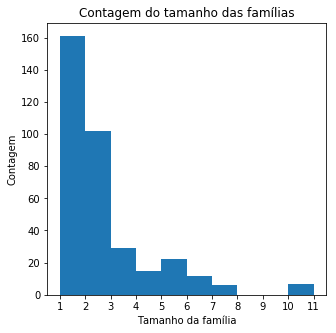

In [3]:
#VERIFICANDO DAS FAMÍLIAS
tamanhos = range(1, 12, 1)
plt.hist(x=df['family'], bins=tamanhos)
plt.title('Contagem do tamanho das famílias')
plt.xlabel('Tamanho da família')
plt.xticks(range(1, 12, 1))
plt.ylabel('Contagem');

Este gráfico que a maioria das pessoas não viajou em família, o que permite levantar a hipótese que boa parte dos passageiros
não estava viajando por lazer.

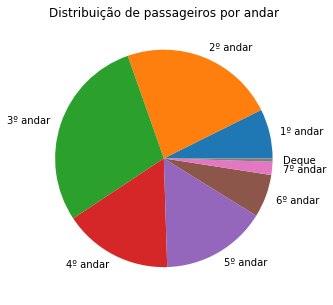

In [4]:
#ONDE HAVIA MAIS GENTE NO BARCO

df_c.groupby('cabin').size().plot.pie(label='', rot = 0)
plt.title('Distribuição de passageiros por andar');

A maior parte das pessoas estavam nos andares intermediários, entretanto,  foi observado
 que a maioria dos dados sobre localização eram referentes à passageiros da primeira classe, o 
que iria comprometer a análise de sobreviventes por andar

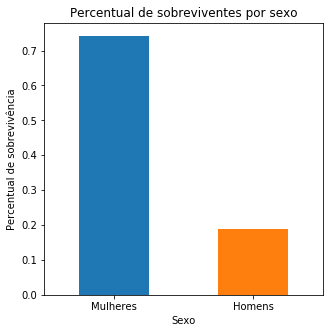

In [5]:
#ETAPA DE FAZER ANALISES REFERENTES AO SEXO DOS SOBREVIVENTES#

df_surv.groupby('sex').size().div(df.groupby('sex').size()).plot.bar(rot = 0).set_xticklabels(('Mulheres', 'Homens'))

#plotando gráfico
plt.title('Percentual de sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual de sobrevivência');

Das variáveis analisadas, o sexo foi o mais importante para determinar a sobrevivência de um 
passageiro, visto que mulheres apresentaram mais de 3 vezes mais chances de sobreviver ao naufrágio. 
Considerando probabilidades extremamente baixas de resgatar alguém com vida na água e que não havia botes 
para todos, esse gráfico indica que as mulheres tiveram o embarque em botes priorizados em relação aos homens.

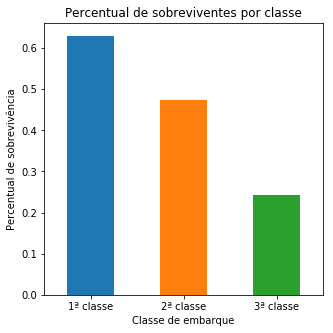

In [6]:
#ANÁLISE DE SOBREVIVENTES POR CLASSE

#Agrupando passageiros por classe (coluna pclasse) e plotando gráfico
graph_class = df_surv.groupby('pclass').size().div(df.groupby('pclass').size()).plot.bar(rot = 0)
graph_class.set_xticklabels(('1ª classe', '2ª classe',  '3ª classe'))

plt.title('Percentual de sobreviventes por classe')
plt.xlabel('Classe de embarque')
plt.ylabel('Percentual de sobrevivência');

Sobre à classe dos passageiros, percebe-se um padrão no qual passageiros das classes mais caras
foram priorizados para ser embarcados nos botes e consequentemente, tiveram maiores chances de sobrevivência.

C:\Users\mathe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


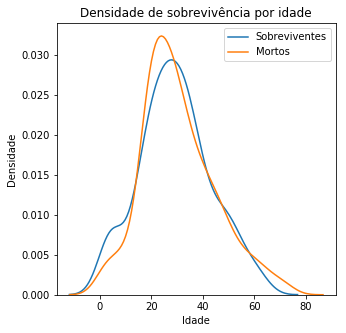

In [7]:
#ANÁLISE REFERENTE À IDADE DOS SOBREVIVENTES

df_idade = df.dropna(subset=['age']) #data frame apenas com passageiros cujas idades foram identificadas
df_idade_surv =  df_idade.query('survived == "1"') #data frame dos sobreviventes
df_idade_dead =  df_idade.query('survived == "0"') #data frame dos que morreram

#Plotando gráficos
sns.kdeplot(df_idade_surv['age'], clip=[df_idade_dead['age'].min(), df_idade_dead['age'].max()]);
sns.kdeplot(df_idade_dead['age']).legend(['Sobreviventes','Mortos']);

plt.title('Densidade de sobrevivência por idade')
plt.xlabel('Idade')
plt.ylabel('Densidade');

A faixa etária que apresentou uma maior probabilidade de sobrevivência foi entre 0 e aproximadamente 10 anos. Por outro lado, o naufrágio foi foi mais letal para aquelas pessoas tinham entre 20 e 30 anos. Dos 10 aos 20 anos e dos 30 aos 60 anos, cerca de metade dos passageiros sobreviveram. Destaca-se, por fim, que os idosos (de 60 a 80 anos) tiveram mais chances de morrer que o contráio, sugerindo que idade avançada não foi um critério de seleção para embarcar nos botes.

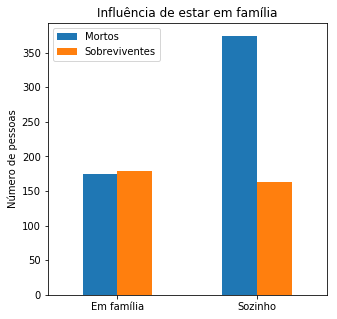

In [8]:
#ANÁLISE SE ESTAR EM FAMÍLIA CONTRIBUIU PARA A SOBREVIVÊNCIA

#Defindo se a pessoa estava sozinha ou não
for pessoa in range(len(df)):
    if df.loc[pessoa, 'family'] != 0:
        df.loc[pessoa, 'family']= 'Em família'
    else: df.loc[pessoa, 'family'] = 'Sozinho'
        
#Agrupando pessoas por estar em família ou não e plotando gráfico        
df.groupby(['family', 'survived']).size().unstack().plot.bar(rot=0).legend(['Mortos', 'Sobreviventes'])

plt.title('Influência de estar em família')
plt.xlabel('')
plt.ylabel('Número de pessoas');

Os passageiros que estavam em família apresentaram uma sobrevivência maior que aqueles que estavam 
sozinhos. Isso pode ser evidência que tentaram não separar famílias, sobretudo quando se tratava de crianças. 
Todavia, isso pode ser apenas um reflexo do fato de que possivelmente a maioria das crianças (que como foi visto anteriormente,
apresentatam grandes índices de sobrevivência), não embarcou desacompanhada.

## Conclusões

- O sexo do passageiro parece ter sido o fator que mais influenciou sobrevivência dos passageiros
- Pessoas que pagaram mais pelo bilhete foram priorizadas no embarque aos botes em relação às demais classes
- Em termos de idade, foi percebido um padrão de sobrevivência diferenciada apenas para crianças
- Pessoas que estavam em família tiveram maior índice de sobrevivência

Algumas das análises perfomadas apresentaram padrões claros, o que poderia ser suficiente para chegar à conclusões sem o uso de testes estatísticos. Para a análise de sobrevivência por idade, talvez fosse necessário o uso de algum teste, apesar de haver certo grau de diferença entre algumas faixas de idade.
Um exame mais aprofundado seria importante a fim de determinar se há uma sobre posição entre as variáveis escolhidas para explicar a sobrevivência, conforme mencionado na discussão da sobrevivência por estar em família ou não.
A falta de informações referente ao andar em que os passageiros estavam descartou a possibilidade de utilizar essa variável para tentar explicar a sobrevivência dos passageiros. Além no número de observações relativamente pequeno (204), a amostra obtida estava muito enviesada, visto que a mairia dos dados se referiam à passageiros de primeira classe. Para os dados de idades, apesar de estarem em menor quantidade que os demais (sendo que o conjunto de dados utilizado por si só já representa menos da metade do total passageiros), foram considerados suficientes para fazer as análises. Contudo, foi necessário assumir que essa amostra era representativa do total.


REFERÊNCIA
1- encyclopedia-titanica.org/titanic-deckplans/e-deck.html
